In [24]:
import numpy as np

def mat(n):
    res = np.hstack( ( np.vstack((np.eye(n), np.zeros((1, n)))), np.vstack((np.zeros((1, n)), -np.eye(n))) ))
    return res

In [25]:
mat(4)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -1., -0., -0., -0.],
       [ 0.,  0.,  1.,  0., -0., -1., -0., -0.],
       [ 0.,  0.,  0.,  1., -0., -0., -1., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -1.]])

In [26]:
def vecf (u, delt=0.1, F=lambda x: x):
    resp = np.array([F(u[i]+delt) for i in range(len(u))])
    resm = np.array([F(u[i]-delt) for i in range(len(u))])
    return np.hstack((resp, resm))

def gradf (u, delt=0.1, rho=lambda x: 1):
    n = len(u)
    matp = np.diag([rho(u[i]+delt) for i in range(n)])
    matm = np.diag([rho(u[i]-delt) for i in range(n)])
    return np.hstack((matp, matm))

In [27]:
u=np.linspace(0,1,5)[1:-1]
#vecf(u)
gradf(u,rho=lambda x: 1, delt=0.1)

array([[1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1]])

In [28]:
def loss(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    ma = mat(n)
    a = alpha*np.ones(n+1); a[-1] -=1
    residual = np.dot(ma,vecf(u,delt=delt, F=F)) - a
    return 0.5 * np.dot(residual,residual)

In [29]:
def dloss_dalpha(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    ma = mat(n)
    a = alpha*np.ones(n+1); a[-1] -=1
    residual = np.dot(ma,vecf(u,delt=delt, F=F)) - a
    return -np.sum(residual)

In [30]:
def gradu(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    ma = mat(n)
    a = alpha*np.ones(n+1); a[-1] -=1
    residual = np.dot(ma,vecf(u,delt=delt, F=F)) - a
    gft = gradf(u,delt=delt, rho=rho)
    return np.dot(gft, np.dot(ma.T,residual))


In [41]:
def d2loss_dalpha2(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    return float(n+1)
def d2loss_dualpha(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    ma = mat(n)
    gf = gradf(u,delt=delt, rho=rho).T
    return -np.sum(np.dot(ma,gf), axis=0)
def d2loss_du2(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1, drho=lambda x: 0):
    n = len(u)
    ma = mat(n)
    gf = gradf(u,delt=delt, rho=rho).T
    first = np.dot(gf.T, np.dot(ma.T,ma).dot(gf))
    a = alpha*np.ones(n+1); a[-1] -=1
    residual = np.dot(ma,vecf(u,delt=delt, F=F)) - a
    mtres = np.dot(ma.T,residual)
    vsecond = np.zeros(n)
    for i in range(n):
        vsecond[i] = drho(u[i]+delt)*mtres[i] + drho(u[i]-delt)*mtres[i+n]
    second = np.diag(vsecond)
    return first + second


In [32]:
import numdifftools as nd
nd.Gradient(lambda x: loss(x, alpha=0.1, delt=0.1, F=lambda x: x))(u)

array([-1.00000000e-01, -9.42277641e-18,  1.00000000e-01])

In [33]:
gradu(u, alpha=0.1, delt=0.1, F=lambda x: x, rho=lambda x: 1)

array([-0.1,  0. ,  0.1])

In [34]:
nd.Gradient(lambda alpha: loss(u, alpha=alpha, delt=0.1, F=lambda x: x))(0.1)

array(-1.2)

In [35]:
dloss_dalpha(u, alpha=0.1, delt=0.1, F=lambda x: x, rho=lambda x: 1)

np.float64(-1.2)

In [36]:
nd.Hessian(lambda x: loss(x, alpha=0.1, delt=0.1, F=lambda x: x))(u)

array([[ 2., -1.,  0.],
       [-1.,  2., -1.],
       [ 0., -1.,  2.]])

In [42]:
d2loss_du2(u, alpha=0.1, delt=0.1, F=lambda x: x, rho=lambda x: 1, drho=lambda x: 0)

array([[ 2., -1.,  0.],
       [-1.,  2., -1.],
       [ 0., -1.,  2.]])

In [ ]:
alpha = 0.1
u = np.linspace(0,1,5)[1:-1]

for i in range(100):
    print(i, loss(u, alpha=alpha, delt=0.1, F=lambda x: x), dloss_dalpha(u, alpha=alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1), gradu(u, alpha=alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1))
    alpha -= 0.1*dloss_dalpha(u, alpha=alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1)
    u -= 0.1*gradu(u, alpha=alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1)


In [6]:
from scipy.stats import norm 

In [ ]:
alpha = 0.1
u = np.linspace(-1,1,10)[1:-1]
step = 0.1
delt = 0.05
# dloss_dalpha(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf),gradu(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf)
for i in range(10000):
    if (not i%100):
        print(i, loss(u, alpha=alpha, delt=delt, F=norm.cdf), dloss_dalpha(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf), gradu(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf))
    alpha -= step*dloss_dalpha(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf)
    u -= step*gradu(u, alpha=alpha, delt=delt, F=norm.cdf, rho=norm.pdf)



0 0.019065639956072633 -0.3820255652818547 [ 0.04006832 -0.0043892  -0.00307634 -0.00110928  0.00110928  0.00307634
  0.0043892  -0.04006832]
100 0.002036613329394152 7.60256283866001e-05 [ 0.0095453   0.00462641  0.00143084  0.00022181 -0.00022181 -0.00143084
 -0.00462641 -0.0095453 ]
200 0.0007456910242248103 4.5121800624825514e-05 [ 0.00454041  0.0032249   0.00184007  0.00058881 -0.00058881 -0.00184007
 -0.0032249  -0.00454041]
300 0.00030169066616484726 2.8382433164608756e-05 [ 0.00265671  0.00207895  0.00130538  0.00044386 -0.00044386 -0.00130538
 -0.00207895 -0.00265671]
400 0.00012669441199039016 1.8247895842204986e-05 [ 0.00167744  0.00133488  0.00085043  0.00029157 -0.00029157 -0.00085043
 -0.00133488 -0.00167744]
500 5.439041599298655e-05 1.188187267209262e-05 [ 0.00109159  0.00086332  0.00054813  0.00018764 -0.00018764 -0.00054813
 -0.00086332 -0.00109159]
600 2.368599137496921e-05 7.803440108589133e-06 [ 0.00071977  0.00056316  0.00035522  0.00012121 -0.00012121 -0.00035522

In [16]:
alpha

np.float64(0.13973680691667825)

In [17]:
[norm.cdf(u[0]+delt),*[norm.cdf(u[i]+delt)-norm.cdf(u[i-1]-delt) for i in range(1,len(u))],1-norm.cdf(u[-1]-delt)]

[np.float64(0.13973680691668333),
 np.float64(0.1397368069166784),
 np.float64(0.13973680691667673),
 np.float64(0.13973680691667595),
 np.float64(0.13973680691667562),
 np.float64(0.1397368069166759),
 np.float64(0.13973680691667667),
 np.float64(0.13973680691667845),
 np.float64(0.13973680691668333)]

In [18]:
r = np.random.standard_normal(100000000)

In [19]:
r.sort()

In [21]:
[np.sum((r<=u[0]+delt))/len(r), *[np.sum((r>=u[i-1]-delt) & (r<=u[i]+delt))/len(r) for i in range(1,len(u))],np.sum((r>=u[-1]-delt))/len(r)]


[np.float64(0.13969163),
 np.float64(0.1396893),
 np.float64(0.13971746),
 np.float64(0.13971993),
 np.float64(0.13976683),
 np.float64(0.13981777),
 np.float64(0.1397097),
 np.float64(0.13975019),
 np.float64(0.13974904)]

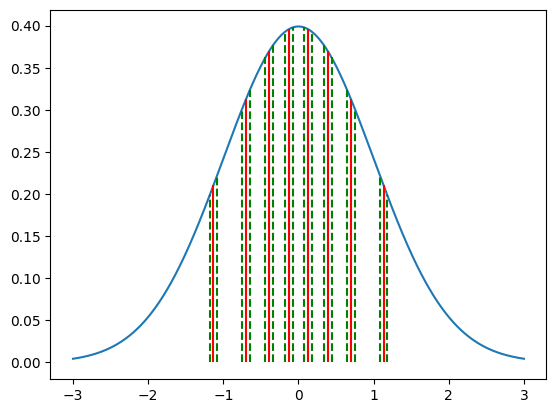

In [22]:
from matplotlib import pyplot as plt
x = np.linspace(-3,3,1000)
plt.plot(x, norm.pdf(x))
plt.vlines(u, 0, norm.pdf(u), colors='r')
plt.vlines(u-delt, 0, norm.pdf(u-delt), colors='g', linestyles='dashed')
plt.vlines(u+delt, 0, norm.pdf(u+delt), colors='g', linestyles='dashed')
plt.show()

### Now try with Hessian

In [57]:
def hess(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1, drho=lambda x: 0):
    n = len(u)
    res = np.zeros((n+1,n+1))
    res[0,0] = d2loss_dalpha2(u, alpha, delt=delt, F=F, rho=rho)
    res[0,1:] = d2loss_dualpha(u, alpha, delt=delt, F=F, rho=rho)
    res[1:,0] = res[0,1:]
    res[1:,1:] = d2loss_du2(u, alpha, delt=delt, F=F, rho=rho, drho=drho)
    return res
def grad(u, alpha, delt=0.1, F=lambda x: x, rho=lambda x: 1):
    n = len(u)
    res = np.zeros(n+1)
    res[0] = dloss_dalpha(u, alpha, delt=delt, F=F, rho=rho)
    res[1:] = gradu(u, alpha, delt=delt, F=F, rho=rho)
    return res



In [63]:
from scipy.stats import norm

alpha = 0.1
u = np.linspace(-1,1,10)[1:-1]
step = 0.1
delt = 0.05
vec = np.hstack((alpha, u))
grad(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf)
for i in range(10):
    if (not i%1):
        print(i, loss(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf), grad(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf))
    hessian = hess(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf, drho=lambda x: -x*norm.pdf(x))
    ihessian = np.linalg.inv(hessian)
    vec -= np.dot(ihessian, grad(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf))
    # vec -= step*grad(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf)

####u, grad(vec[1:], alpha=vec[0], delt=delt, F=norm.cdf, rho=norm.pdf)
alpha, u = vec[0], vec[1:]
alpha, *[norm.cdf(u[0]+delt),*[norm.cdf(u[i]+delt)-norm.cdf(u[i-1]-delt) for i in range(1,len(u))],1-norm.cdf(u[-1]-delt)]

0 0.019065639956072633 [-0.38202557  0.04006832 -0.0043892  -0.00307634 -0.00110928  0.00110928
  0.00307634  0.0043892  -0.04006832]
1 0.00083297365023444 [ 7.26531234e-04  8.82277784e-03 -1.98266591e-03 -4.32761994e-04
 -5.56812677e-05  5.56812677e-05  4.32761994e-04  1.98266591e-03
 -8.82277784e-03]
2 1.7722419522761498e-05 [ 4.97230627e-06  1.16910520e-03 -3.02081979e-04 -3.30431870e-05
 -5.25212139e-06  5.25212139e-06  3.30431870e-05  3.02081979e-04
 -1.16910520e-03]
3 1.477394820142129e-08 [-7.36802123e-07  3.33123797e-05 -9.21954371e-06 -8.61431907e-07
 -1.64147705e-07  1.64147705e-07  8.61431907e-07  9.21954371e-06
 -3.33123797e-05]
4 1.1566365099777875e-14 [-8.11519463e-10  2.95060613e-08 -8.32228652e-09 -7.20823278e-10
 -1.39147074e-10  1.39147118e-10  7.20823280e-10  8.32228646e-09
 -2.95060613e-08]
5 7.115876654715383e-27 [-1.66533454e-16  2.31450007e-14 -6.55383258e-15 -5.68408271e-16
 -1.39121824e-16  1.39121824e-16  5.89310059e-16  6.55504304e-15
 -2.31621901e-14]
6 5.85

(np.float64(0.13973680691667803),
 np.float64(0.139736806916678),
 np.float64(0.13973680691667806),
 np.float64(0.13973680691667806),
 np.float64(0.139736806916678),
 np.float64(0.139736806916678),
 np.float64(0.139736806916678),
 np.float64(0.139736806916678),
 np.float64(0.139736806916678),
 np.float64(0.139736806916678))